In [1]:
import numpy as np

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox.random import Distribution

from sklearn.datasets import load_iris

from fromscratchtoml.cluster import DBSCAN

%matplotlib inline

## DBSCAN - Density-based spatial clustering of applications with noise

In [2]:
eps = 0.6
min_points = 5

X1 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, 0])
X2 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, -6])
X3 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[6, -3])

X = np.vstack([X1, X2, X3])

/home/markroxor/Documents/jellAIfish/venv_fs2ml/local/lib/python2.7/site-packages/fromscratchtoml-0.0.2-py2.7.egg/fromscratchtoml/toolbox/random.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, covr, pts)


In [3]:
db5 = DBSCAN(eps, min_points)
db5.fit(X)

DBSCAN({'eps': 0.6, 'min_neigh': 5})

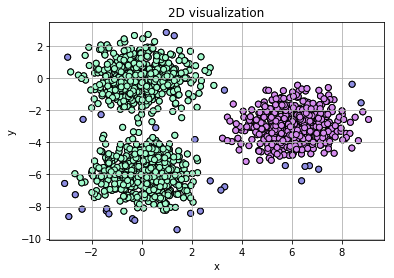

In [4]:
binary_visualize(X, db5.clan)

In [11]:
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import Set3
output_notebook()

x = X[:, 0]
y = X[:, 1]
colored_y = [Set3[12][int(db5.clan[i])] for i in range(len(db5.clan))]
line_color = ['black' for i in range(len(db5.clan))]

import pickle
with open('DBSCAN_fill_colors.pkl', 'rb') as f:
    fill_colors = pickle.load( f)
    
# fill_colors = {}
# for j in range(2, 11):
#     print(j)
#     db = DBSCAN(eps, j)
#     db.fit(X)
#     fill_colors[j] = [Set3[12][int(db.clan[i])] for i in range(len(db.clan))]
    
# import pickle
# with open('DBSCAN_fill_colors.pkl', 'wb') as f:
#     pickle.dump(fill_colors, f)
    
source = ColumnDataSource(data=dict(x=x, y=y, color=colored_y, line_color=line_color))

p = figure(plot_height=600, plot_width=800, title="DBSCAN")
p.circle('x','y', radius=0.1, fill_color='color', source=source, line_color='line_color')

callback = CustomJS(args=dict(source=source, fill_colors=fill_colors), code="""
    var data = source.data
    var value = cb_obj.value

    data.color = fill_colors[value]
    source.change.emit();
""")

slider = Slider(start=2, end=10, value=5, step=1, title="Min points",
                callback=callback)
layout = column(slider, p)

show(layout)

Loading BokehJS ...

In [ ]:
db.clan+1


## Classifying against custom data

In [12]:
x1 = Distribution.linear(pts=10, mean=[0, 20])
y1 = np.ones([len(x1), 1])

x2 = Distribution.linear(pts=10, mean=[0, 0])
y2 = -np.ones([len(x2), 1])

x3 = Distribution.linear(pts=10, mean=[2, 10])
y3 = 2*np.ones([len(x3), 1])

X = np.vstack([x1, x2, x3])
Y = np.vstack([y1, y2, y3])

In [13]:
eps = 2
min_points = 2

In [14]:
db = DBSCAN(eps, min_points)
db.fit(X)

DBSCAN({'eps': 2, 'min_neigh': 2})

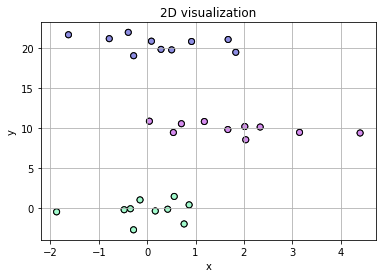

In [15]:
binary_visualize(X, db.clan)

In [16]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

Automatically created module for IPython interactive environment


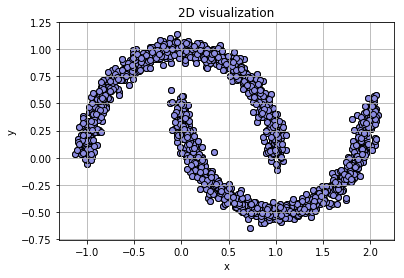

In [31]:
binary_visualize(noisy_moons[0])

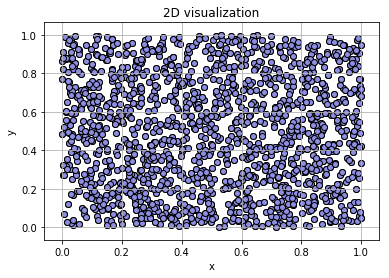

In [32]:
binary_visualize(no_structure[0])

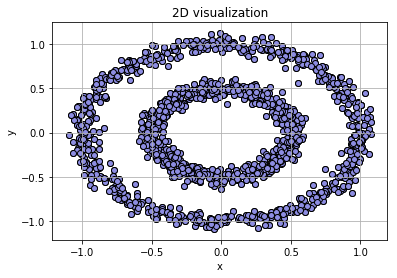

In [33]:
binary_visualize(noisy_circles[0])

## Cresents

In [36]:
X, y = noisy_moons
db = DBSCAN(0.1, 2)
db.fit(X)

DBSCAN({'eps': 0.1, 'min_neigh': 2})

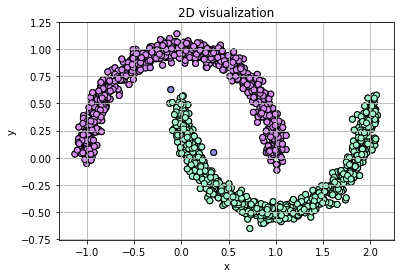

In [37]:
binary_visualize(X, db.clan)

here


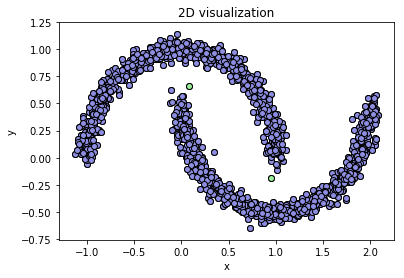

here


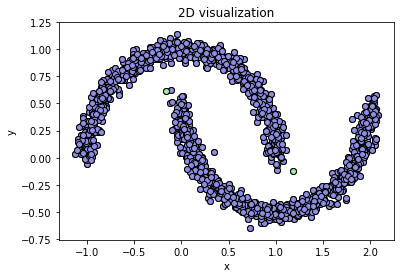

here


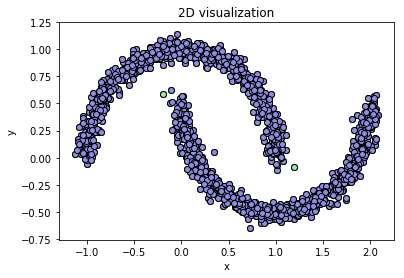

here


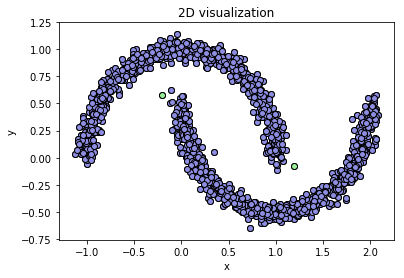

here


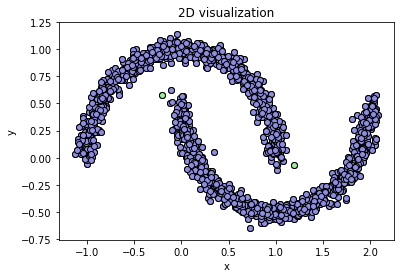

here


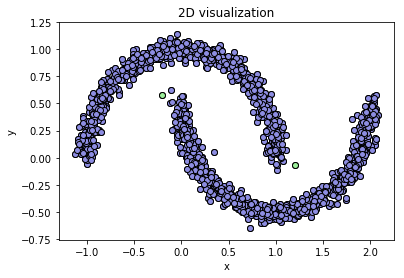

here


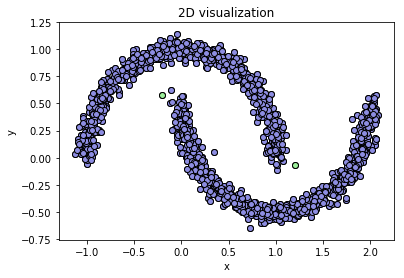

here


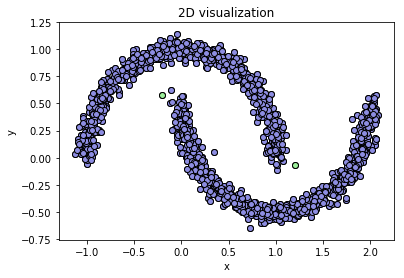

here


KMeans({'vis_iter': 1, 'max_iter': 500, 'n_clusters': 2})

In [19]:
from fromscratchtoml.cluster import KMeans

km10 = KMeans(n_clusters=2, vis_iter=1)
km10.fit(X)

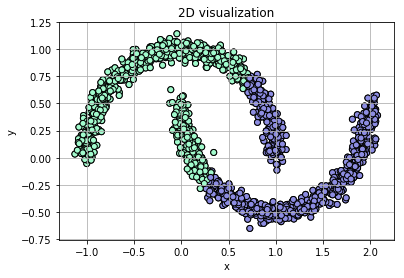

In [20]:
binary_visualize(X, km10.labels)

## NO structure

In [21]:
X, y = no_structure

In [22]:
db = DBSCAN(0.1, 2)
db.fit(X)

DBSCAN({'eps': 0.1, 'min_neigh': 2})

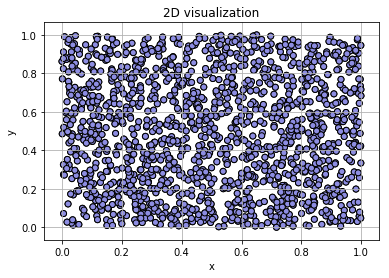

In [23]:
binary_visualize(X, db.clan)

here


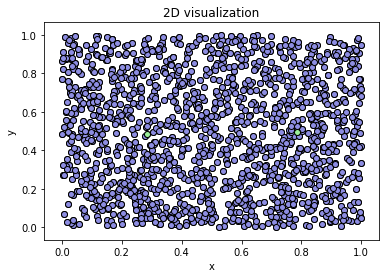

here


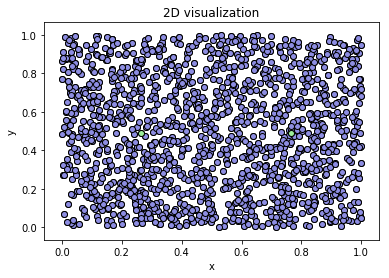

here


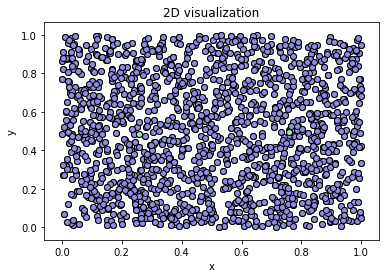

here


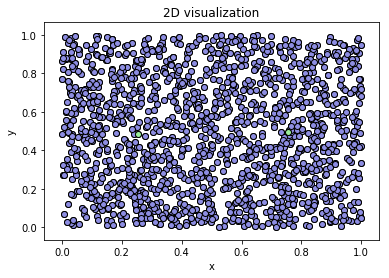

here


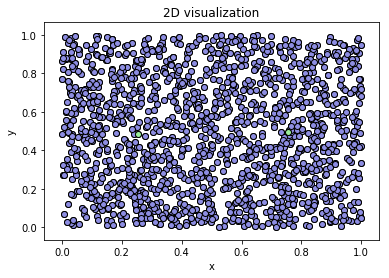

here


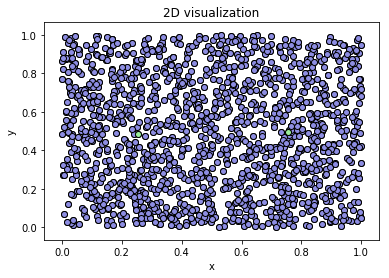

here


KMeans({'vis_iter': 1, 'max_iter': 500, 'n_clusters': 2})

In [24]:
from fromscratchtoml.cluster import KMeans

km10 = KMeans(n_clusters=2, vis_iter=1)
km10.fit(X)

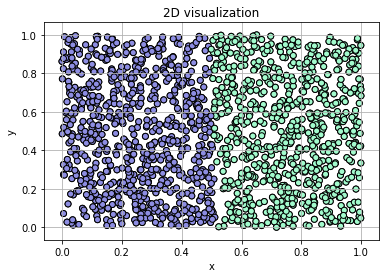

In [25]:
binary_visualize(X, km10.labels)

## Noisy circles

In [26]:
X, y = noisy_circles

In [27]:
db = DBSCAN(0.1, 2)
db.fit(X)

DBSCAN({'eps': 0.1, 'min_neigh': 2})

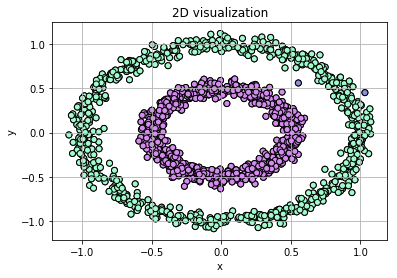

In [28]:
binary_visualize(X, db.clan)

here


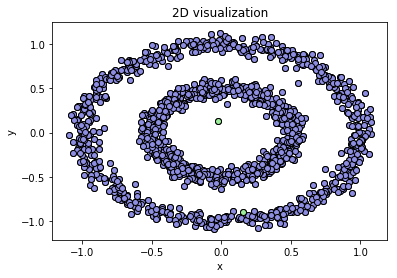

here


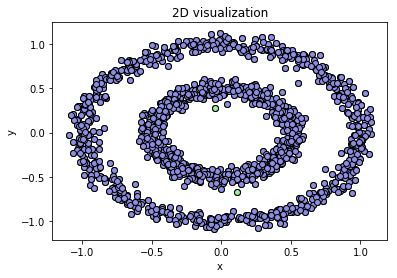

here


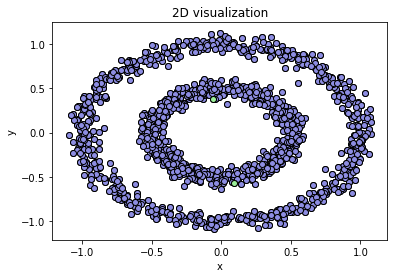

here


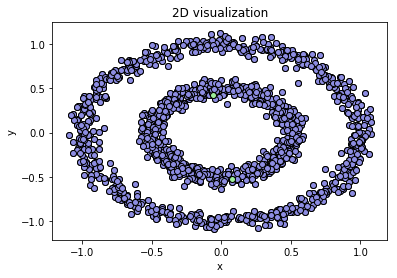

here


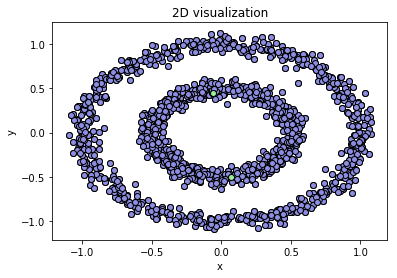

here


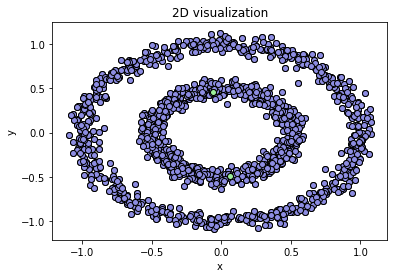

here


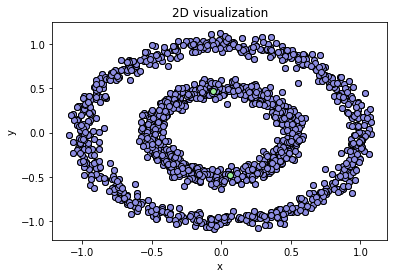

here


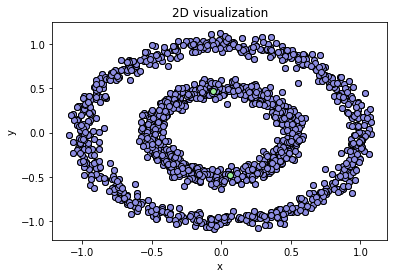

here


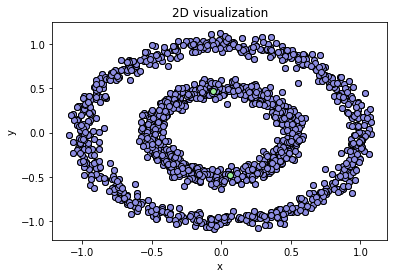

here


KMeans({'vis_iter': 1, 'max_iter': 500, 'n_clusters': 2})

In [29]:
from fromscratchtoml.cluster import KMeans

km10 = KMeans(n_clusters=2, vis_iter=1)
km10.fit(X)

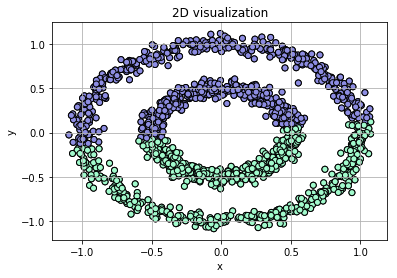

In [30]:
binary_visualize(X, km10.labels)